In [1]:
from random import random
import numpy as np

In [2]:
def get_line_from_perceptron_weight(w):
    x = [0, 1]
    y = [-w[2]/w[1], (-w[2]-w[0])/w[1]]
    return (x, y)

def get_real_separator_line(line):
    x = [0, 1]
    y = [line[0], line[0] + line[1]]
    return (x, y)

In [22]:
import matplotlib.pyplot as plt
import time
from IPython import display

def update_plot(x, y, labels, line, w):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.set_ylim([0,1])
    ax1.set_xlim([0,1])

    ax1.scatter(x[labels], y[labels], s=30, c='b', marker='+')
    ax1.scatter(x[~labels],y[~labels], s=30, c='r', marker="+")

    lx, ly  = get_real_separator_line(line)
    ax1.plot(lx, ly, 'g', lw=2)

    lx, ly = get_line_from_perceptron_weight(w)
    ax1.plot(lx, ly, 'k', lw=2)

    plt.show()

In [4]:
def get_perceptron_predictions(x, y, label, w):
    return (np.inner(np.array([x, y, 1]), w) > 0) == label

def update_w(w, x, y, label):
    return w + (1 if label else -1)*np.array([x, y, 1])

In [5]:
def get_random_points(n):
    x=np.random.rand(n)
    y=np.random.rand(n)
    return x,y

def get_random_labels(x,y):
    labels = np.array(True)
    while(labels.all() or not labels.any()):
        a = np.random.rand(1)
        b = np.random.rand(1)
        labels = np.array([y > b*x + a for x,y in zip(x,y)]).flatten()
    return labels, [a[0], b[0]]

def get_initial_w():
    w = np.array([0, 0 , 0])
#     w = np.array([-0.5, -0.5 , 0.5])
    return w

In [24]:
from itertools import count

def train_perceptron(x, y, labels, w, animate=False, line=False): 
    for num_iterations in count(start=0, step=1):    
        predictions = get_perceptron_predictions(x, y, labels, w)

        if predictions.all():
            break

        missclassified_points_indexes = np.where(predictions==False)[0]
        k = np.random.choice(missclassified_points_indexes, 1)[0]
        w = update_w(w, x[k], y[k], labels[k])
        
        if(animate==True):
            display.clear_output(wait=True)
            update_plot(x, y, labels, line, w)
            time.sleep(0.025)
    return w, num_iterations

In [25]:
def run_experiment(n=10, animate=False):
    x, y = get_random_points(n)
    labels, line = get_random_labels(x,y)
    w = get_initial_w()
    w, iterations = train_perceptron(x, y, labels, w, animate, line)
    return iterations

In [26]:
RUNS = 1000
N  = 10
total_iterations = 0

for i in range(RUNS):
    iterations = run_experiment(N)
    total_iterations += iterations

print(total_iterations/RUNS)

24.29


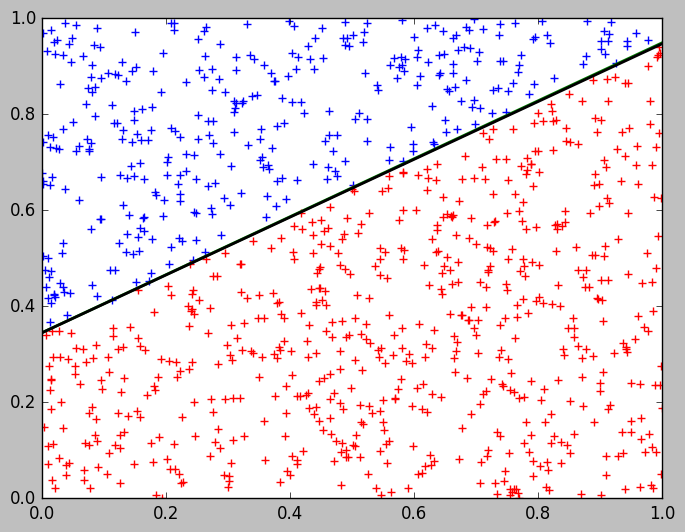

711

In [28]:
run_experiment(1000, animate=True)